In [1]:
import sys
sys.path.append('../')
from pathlib import Path
import json
import numpy as np

from ue4nlp.ue_scores import sampled_max_prob, bald

In [2]:
res_path_btnk = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_BTLNK_PF/deberta_metric_no_sn/cola/0.0/mc_all/results')
res_path_lora = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_LORA/deberta_metric_no_sn/cola/0.0/mc_all/results')
res_path_no_adp = Path('/home/dsgalimzya/uncertainty_transformers/workdir/run_tasks_for_model_series_NO_ADP/deberta_metric_no_sn/cola/0.0/mc_all/results')

seeds = [4837,42,705525,23419,1084218,10671619]

preds_btnk = []
preds_lora = []
preds_no_adp = []

for seed in seeds:
    with open(Path(res_path_btnk) / str(seed) / 'dev_inference.json') as f:
        model_outputs_adp = json.loads(f.read())
    preds_btnk.append(model_outputs_adp['sampled_probabilities'])
    
    with open(Path(res_path_lora) / str(seed) / 'dev_inference.json') as f:
        model_outputs_adp = json.loads(f.read())
    preds_lora.append(model_outputs_adp['sampled_probabilities'])

    with open(Path(res_path_no_adp) / str(seed) / 'dev_inference.json') as f:
        model_outputs_no_adp = json.loads(f.read())
    preds_no_adp.append(model_outputs_no_adp['sampled_probabilities'])

preds_btnk = np.array(preds_btnk)
preds_lora = np.array(preds_lora)
preds_no_adp = np.array(preds_no_adp)

avg_preds_btnk = np.mean(preds_btnk, axis=0)
avg_preds_lora = np.mean(preds_lora, axis=0)
avg_preds_no_adp = np.mean(preds_no_adp, axis=0)

In [3]:
bald_scores_btnk = bald(avg_preds_btnk.transpose(1, 0, 2))
bald_scores_lora = bald(avg_preds_lora.transpose(1, 0, 2))
bald_scores_no_adp = bald(avg_preds_no_adp.transpose(1, 0, 2))

smp_scores_btnk = sampled_max_prob(avg_preds_btnk.transpose(1, 0, 2))
smp_scores_lora = sampled_max_prob(avg_preds_lora.transpose(1, 0, 2))
smp_scores_no_adp = sampled_max_prob(avg_preds_no_adp.transpose(1, 0, 2))

# BALD scores

In [4]:
from scipy.stats import pearsonr

print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(bald_scores_btnk, bald_scores_no_adp).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(bald_scores_lora, bald_scores_no_adp).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.64
Pearson coeff: LoRA: 0.624


In [21]:
from scipy.stats import spearmanr

print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(bald_scores_btnk, bald_scores_no_adp).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(bald_scores_lora, bald_scores_no_adp).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.752
Spearman coeff: LoRA: 0.713


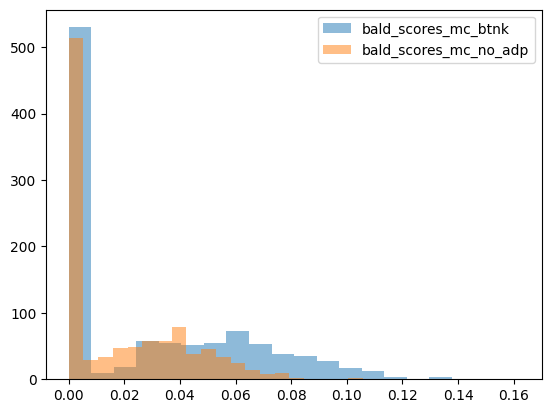

In [11]:
import matplotlib.pyplot as plt

plt.hist(bald_scores_btnk, bins=20, alpha=0.5, label='bald_scores_mc_btnk')
plt.hist(bald_scores_no_adp, bins=20, alpha=0.5, label='bald_scores_mc_no_adp')
plt.legend()
plt.show()

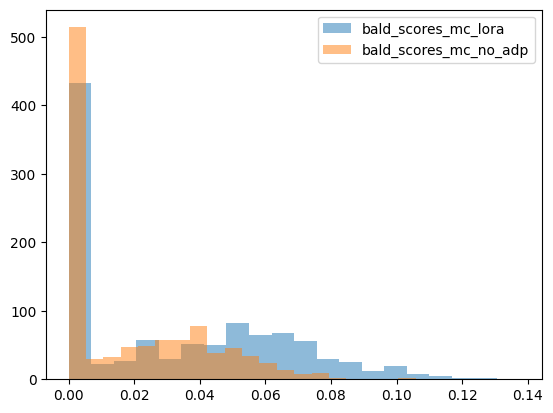

In [13]:
plt.hist(bald_scores_lora, bins=20, alpha=0.5, label='bald_scores_mc_lora')
plt.hist(bald_scores_no_adp, bins=20, alpha=0.5, label='bald_scores_mc_no_adp')
plt.legend()
plt.show()

# Sampled max prob scores

In [15]:
print(f'Pearson coeff: bottleneck adapter (Pfeiffer): {round(pearsonr(smp_scores_btnk, bald_scores_no_adp).statistic, 3)}')
print(f'Pearson coeff: LoRA: {round(pearsonr(smp_scores_lora, bald_scores_no_adp).statistic, 3)}')

Pearson coeff: bottleneck adapter (Pfeiffer): 0.524
Pearson coeff: LoRA: 0.562


In [20]:
print(f'Spearman coeff: bottleneck adapter (Pfeiffer): {round(spearmanr(smp_scores_btnk, smp_scores_no_adp).statistic, 3)}')
print(f'Spearman coeff: LoRA: {round(spearmanr(smp_scores_lora, smp_scores_no_adp).statistic, 3)}')

Spearman coeff: bottleneck adapter (Pfeiffer): 0.818
Spearman coeff: LoRA: 0.8


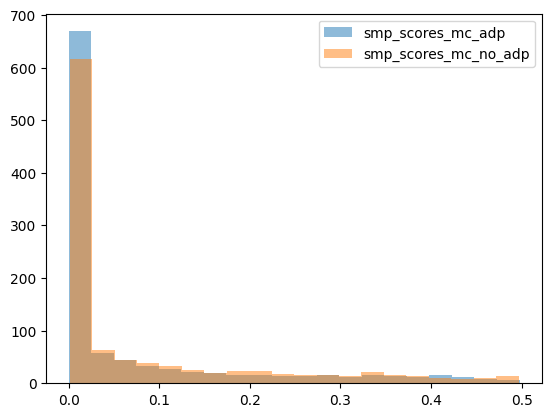

In [16]:
plt.hist(smp_scores_btnk, bins=20, alpha=0.5, label='smp_scores_mc_adp')
plt.hist(smp_scores_no_adp, bins=20, alpha=0.5, label='smp_scores_mc_no_adp')
plt.legend()
plt.show()

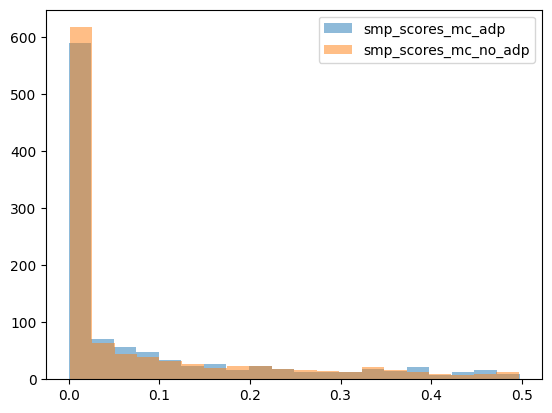

In [17]:
plt.hist(smp_scores_lora, bins=20, alpha=0.5, label='smp_scores_mc_adp')
plt.hist(smp_scores_no_adp, bins=20, alpha=0.5, label='smp_scores_mc_no_adp')
plt.legend()
plt.show()